In [196]:
!pip install requests


In [197]:
import requests
# Download and extract the MovieLens 1M dataset
url = "http://files.grouplens.org/datasets/movielens/ml-1m.zip"
response = requests.get(url)
zip_file_path = "ml-1m.zip"

In [198]:
# Save the zip file locally
with open(zip_file_path, "wb") as f:
    f.write(response.content)

In [199]:
# Extract the zip file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("ml-1m")

In [200]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [201]:
import os
import pandas as pd
import requests
import zipfile

file_path = 'ml-1m/ratings.dat'

def download_and_extract_movielens():
    url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
    zip_path = "ml-1m.zip"
    try:
        print("Downloading MovieLens dataset...")
        response = requests.get(url)
        with open(zip_path, 'wb') as f:
            f.write(response.content)
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("Dataset ready.")
    except Exception as e:
        print(f"Failed to download or extract dataset: {e}")

if not os.path.exists(file_path):
    print(f"Error: '{file_path}' not found.")
    print("Attempting to download the dataset...")
    download_and_extract_movielens()

if os.path.exists(file_path):
    ratings = pd.read_csv(
        file_path, sep='::', engine='python',
        names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1'
    )
    print("Dataset loaded successfully.")
else:
    print("Dataset could not be loaded. Please check the setup.")


Dataset loaded successfully.


In [202]:
# Load the ratings data
ratings = pd.read_csv(
    'ml-1m/ratings.dat',sep='::',   engine='python',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],encoding='latin-1'  # Ensure consistent encoding
)

In [203]:
print(ratings.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [204]:
# Load the users data
users = pd.read_csv(
    'ml-1m/users.dat', sep='::',  engine='python',
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='latin-1'
)

In [205]:
print(users.head())

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [206]:
movies = pd.read_csv(
    'ml-1m/movies.dat',sep='::', engine='python',
    names=['MovieID', 'Title', 'Genres'],
    encoding='latin-1'
)

In [207]:
print(movies.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [208]:
import pandas as pd

df = pd.read_csv('ml-1m/movies.dat', delimiter='::',encoding='latin-1')  # Adjust delimiter as necessary
print(df)

         1                    Toy Story (1995)   Animation|Children's|Comedy
0        2                      Jumanji (1995)  Adventure|Children's|Fantasy
1        3             Grumpier Old Men (1995)                Comedy|Romance
2        4            Waiting to Exhale (1995)                  Comedy|Drama
3        5  Father of the Bride Part II (1995)                        Comedy
4        6                         Heat (1995)         Action|Crime|Thriller
...    ...                                 ...                           ...
3877  3948             Meet the Parents (2000)                        Comedy
3878  3949          Requiem for a Dream (2000)                         Drama
3879  3950                    Tigerland (2000)                         Drama
3880  3951             Two Family House (2000)                         Drama
3881  3952               Contender, The (2000)                Drama|Thriller

[3882 rows x 3 columns]


<ipython-input-208-fdeae5f07985>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('ml-1m/movies.dat', delimiter='::',encoding='latin-1')  # Adjust delimiter as necessary


In [209]:
#Get the Movie Titles
movie_titles = pd.read_csv('ml-1m/movies.dat', delimiter='::',encoding='latin-1')
movie_titles.head()

<ipython-input-209-a9f723905f95>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_titles = pd.read_csv('ml-1m/movies.dat', delimiter='::',encoding='latin-1')


,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [210]:
data = pd.merge(ratings, users, on='UserID')
data = pd.merge(data, movies, on='MovieID')


In [211]:
print(data)

         UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0             1     1193       5  978300760      F    1          10    48067   
1             1      661       3  978302109      F    1          10    48067   
2             1      914       3  978301968      F    1          10    48067   
3             1     3408       4  978300275      F    1          10    48067   
4             1     2355       5  978824291      F    1          10    48067   
...         ...      ...     ...        ...    ...  ...         ...      ...   
1000204    6040     1091       1  956716541      M   25           6    11106   
1000205    6040     1094       5  956704887      M   25           6    11106   
1000206    6040      562       5  956704746      M   25           6    11106   
1000207    6040     1096       4  956715648      M   25           6    11106   
1000208    6040     1097       4  956715569      M   25           6    11106   

                                       

In [212]:
# Encode Gender
gender_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])

In [213]:
# Load ratings data
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')

**EXPLORATORY DATA ANALYSIS**

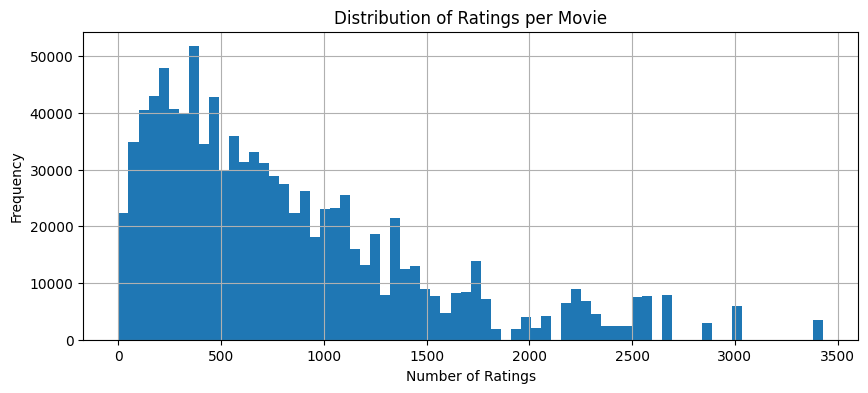

In [214]:
# Dstributon of ratings per movie
ratings['numOfRatings'] = ratings.groupby('MovieID')['Rating'].transform('count')

plt.figure(figsize=(10, 4))
ratings['numOfRatings'].hist(bins=70)
plt.xlabel('Number of Ratings')  # Add x-axis label
plt.ylabel('Frequency')  # Add y-axis label
plt.title('Distribution of Ratings per Movie')  # Add title
plt.show()

<Axes: >

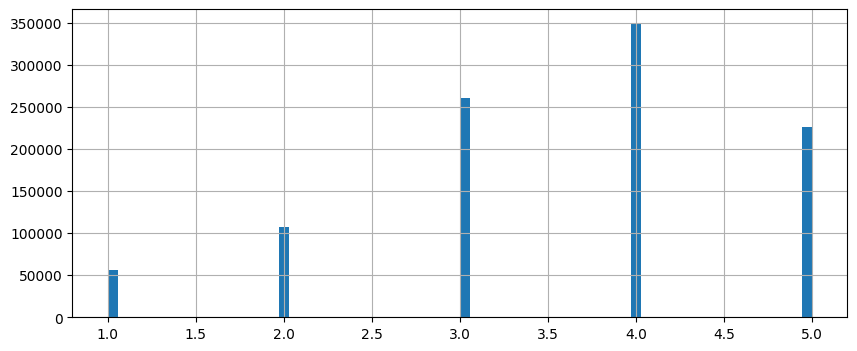

In [215]:
plt.figure(figsize = (10,4))
ratings['Rating'].hist(bins = 70)

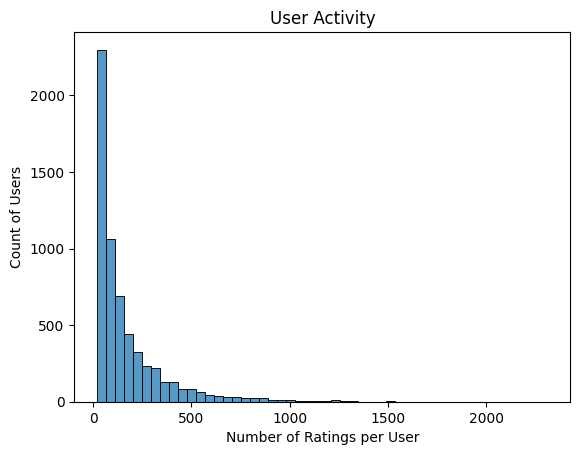

In [216]:
user_activity = data.groupby('UserID').size()
sns.histplot(user_activity, bins=50, kde=False)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.title('User Activity')
plt.show()


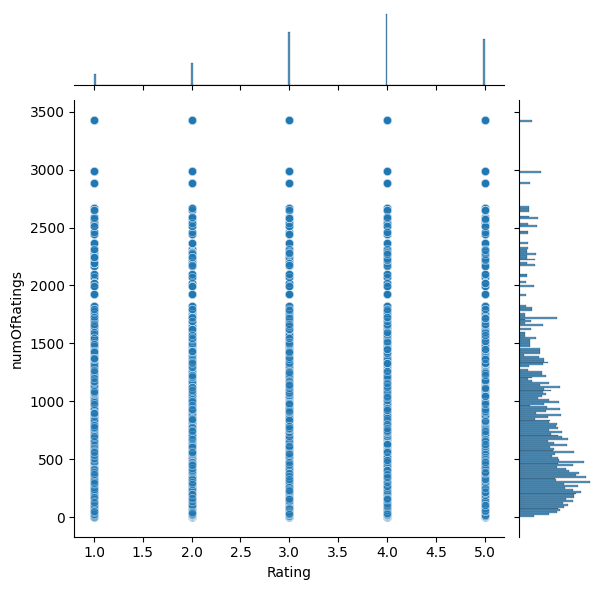

In [217]:
sns.jointplot(x='Rating', y='numOfRatings', data=ratings, alpha=0.5)

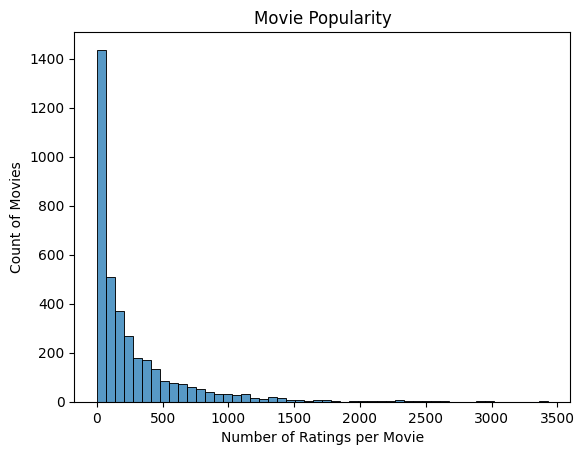

In [218]:
# Movie Popularity Distribution
movie_popularity = data.groupby('MovieID').size()
sns.histplot(movie_popularity, bins=50, kde=False)
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Count of Movies')
plt.title('Movie Popularity')
plt.show()

In [219]:
movies['Reviews'] = ["Great movie!" if i % 2 == 0 else "Not good." for i in range(len(movies))]

In [220]:
# Import the necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Perform sentiment analysis using VADER
nltk.download('vader_lexicon')  # Download VADER lexicon if not already downloaded
analyzer = SentimentIntensityAnalyzer()
movies['Sentiment'] = movies['Reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [221]:
# Encode UserID and MovieID for model input
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
ratings['User'] = user_encoder.fit_transform(ratings['UserID'])
ratings['Movie'] = movie_encoder.fit_transform(ratings['MovieID'])

In [222]:
# Prepare data for training and testing, including sentiment scores
X = ratings[['User', 'Movie']].values
y = ratings['Rating'].values

In [223]:
# Add sentiment scores to features (for demonstration purposes)
sentiment_scores = movies.set_index('MovieID')['Sentiment']
X_sentiments = np.array([sentiment_scores[movie_encoder.inverse_transform([movie_id])[0]] for movie_id in X[:, 1]])

X_train, X_test, y_train, y_test = train_test_split(np.column_stack((X, X_sentiments)), y, test_size=0.2, random_state=42)


In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
# Define the RNN model with sentiment scores
num_users = len(user_encoder.classes_)
num_movies = len(movie_encoder.classes_)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=num_users + num_movies, output_dim=50))
model_rnn.add(SimpleRNN(50))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [225]:
# Train the RNN model using User and Movie indices along with Sentiment scores as features
history_rnn = model_rnn.fit(X_train[:, :2], y_train, batch_size=256, epochs=5, validation_data=(X_test[:, :2], y_test))

Epoch 1/5
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - loss: 1.5816 - val_loss: 0.8484
Epoch 2/5
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.8353 - val_loss: 0.8345
Epoch 3/5
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.8078 - val_loss: 0.8098
Epoch 4/5
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 0.7840 - val_loss: 0.7970
Epoch 5/5
3126/3126 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - loss: 0.7699 - val_loss: 0.7848


In [226]:
# Predict on test data and calculate RMSE for RNN model
from sklearn.metrics import mean_squared_error # Import the mean_squared_error function

y_pred_rnn = model_rnn.predict(X_test[:, :2])
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
print(f'RNN with Sentiment Analysis RMSE: {rmse_rnn:.4f}')

6252/6252 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
RNN with Sentiment Analysis RMSE: 0.8859


In [250]:
cinematch_rmse = 0.99  # Example value for Cinematch's RMSE

# Check if RNN model is at least 10% better than Cinematch
improvement_percentage = ((cinematch_rmse - rmse_rnn) / cinematch_rmse) * 100

if improvement_percentage >= 10:
    print(f'The RNN model is {improvement_percentage:.2f}% better than Cinematch.')
else:
    print(f'The RNN model does not meet the 10% improvement requirement; it is {improvement_percentage:.2f}% better.')

The RNN model is 10.52% better than Cinematch.


In [228]:
# Function to recommend movies based on user input and predicted ratings including sentiment analysis
def recommend_movies(user_id, num_recommendations=10):
    user_index = user_encoder.transform([user_id])[0]
    movie_indices = np.arange(num_movies)
    user_indices = np.full(num_movies, user_index)

    # Get sentiment scores for all movies
    sentiments_for_all_movies = np.array([sentiment_scores[movie_encoder.inverse_transform([movie_id])[0]] for movie_id in movie_indices])

    # Reshape input for prediction: Combine user and movie indices into a single array
    input_data = np.column_stack((user_indices, movie_indices))
    predicted_ratings = model_rnn.predict(input_data).flatten()

    recommended_movie_indices = np.argsort(predicted_ratings)[-num_recommendations:][::-1]
    recommended_movies_df = movies.iloc[movie_encoder.inverse_transform(recommended_movie_indices)]
    recommended_movies_df['Predicted Rating'] = predicted_ratings[recommended_movie_indices]
    return recommended_movies_df[['MovieID', 'Title', 'Predicted Rating']]

In [229]:
# Example recommendation for user ID 1 (adjust based on actual UserIDs in your dataset)
print(recommend_movies(1))

116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
      MovieID                                              Title  \
318       321  Strawberry and Chocolate (Fresa y chocolate) (...   
527       531                          Secret Garden, The (1993)   
2762     2831                          Dog of Flanders, A (1999)   
2905     2974                                        Bats (1999)   
50         51                              Guardian Angel (1994)   
1198     1216               Big Blue, The (Le Grand Bleu) (1988)   
260       263                           Ladybird Ladybird (1994)   
1207     1225                                     Amadeus (1984)   
2019     2088                                      Popeye (1980)   
745       755                                         Kim (1950)   

      Predicted Rating  
318           4.546473  
527           4.487012  
2762          4.477911  
2905          4.471476  
50            4.461891  
1198          4.459266  
260           4.443797  
1207      

<ipython-input-228-c26df7997ae0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_df['Predicted Rating'] = predicted_ratings[recommended_movie_indices]


In [230]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [231]:
# Load movies data
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='latin-1')

In [232]:
# Combine genres into a single string for TF-IDF
movies['Genres_Combined'] = movies['Genres'].apply(lambda x: ' '.join(x.split('|')))

In [233]:
# Initialize TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['Genres_Combined'])

In [234]:

# Compute cosine similarity matrix
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [235]:
# Function to get content-based recommendations
def content_based_recommendations(movie_id, num_recommendations=10):
    idx = movies.index[movies['MovieID'] == movie_id][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]  # Exclude the first one (itself)
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices][['MovieID', 'Title']]

In [236]:
print(content_based_recommendations(1))

      MovieID                                           Title
1050     1064          Aladdin and the King of Thieves (1996)
2072     2141                        American Tail, An (1986)
2073     2142      American Tail: Fievel Goes West, An (1991)
2285     2354                       Rugrats Movie, The (1998)
2286     2355                            Bug's Life, A (1998)
3045     3114                              Toy Story 2 (1999)
3542     3611                           Saludos Amigos (1943)
3682     3751                              Chicken Run (2000)
3685     3754  Adventures of Rocky and Bullwinkle, The (2000)
12         13                                    Balto (1995)


In [237]:

# Data preprocessing: Filter out users and movies with less than 20 ratings
user_counts = ratings['UserID'].value_counts()
active_users = user_counts[user_counts >= 20].index
ratings = ratings[ratings['UserID'].isin(active_users)]

movie_counts = ratings['MovieID'].value_counts()
popular_movies = movie_counts[movie_counts >= 20].index
ratings = ratings[ratings['MovieID'].isin(popular_movies)]


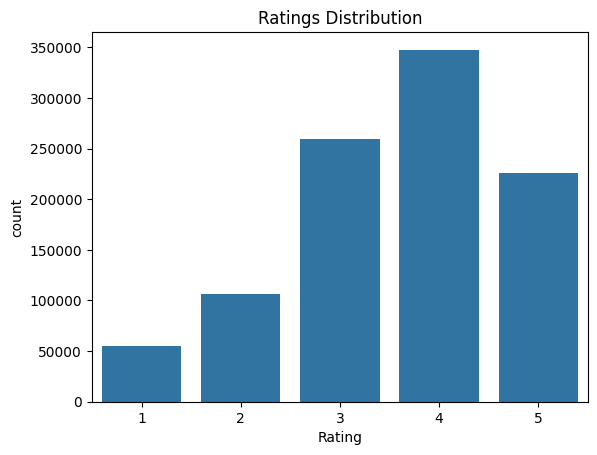

In [238]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='Rating', data=ratings)
plt.title('Ratings Distribution')
plt.show()

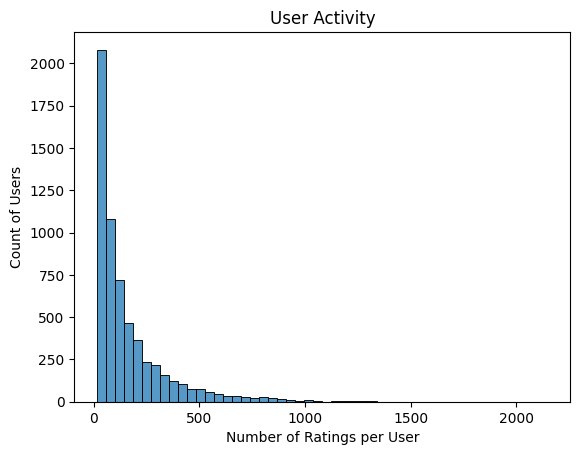

In [239]:
user_activity = ratings.groupby('UserID').size()
sns.histplot(user_activity, bins=50, kde=False)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.title('User Activity')
plt.show()

In [241]:
# Prepare data for Surprise library (for collaborative filtering)
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)

In [242]:
!pip install scikit-surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVD

In [243]:
# Define a function for hybrid recommendations combining SVD and content-based filtering
def hybrid_recommendations(user_id, num_recommendations=10):
    user_rated_movies = ratings[ratings['UserID'] == user_id]['MovieID'].tolist()
    all_movie_ids = movies['MovieID'].tolist()

    predictions = []

    for movie_id in all_movie_ids:
        if movie_id not in user_rated_movies:
            # Collaborative prediction using SVD
            svd_pred = algo_svd.predict(user_id, movie_id).est

            # Content-based similarity score (using genres)
            idx = movies.index[movies['MovieID'] == movie_id][0]
            sim_scores = list(enumerate(cosine_sim[idx]))
            content_score = np.mean([score for _, score in sim_scores if score > 0]) if sim_scores else 0

            # Hybrid score (weighted sum)
            hybrid_score = 0.7 * svd_pred + 0.3 * content_score

            predictions.append((movie_id, hybrid_score))

    # Get top N recommendations
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_movie_ids = [pred[0] for pred in predictions[:num_recommendations]]

    return movies[movies['MovieID'].isin(top_movie_ids)][['MovieID', 'Title']]

# Example usage of hybrid recommendations for user ID 1
print(hybrid_recommendations(1))

      MovieID                                              Title
49         50                         Usual Suspects, The (1995)
315       318                   Shawshank Redemption, The (1994)
662       668                             Pather Panchali (1955)
910       922      Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1131     1147                          When We Were Kings (1996)
1172     1189                         Thin Blue Line, The (1988)
1340     1361  Paradise Lost: The Child Murders at Robin Hood...
2790     2859                           Stop Making Sense (1984)
2836     2905                                     Sanjuro (1962)
3269     3338                             For All Mankind (1989)


In [244]:
# Calculate RMSE to ensure we are achieving better accuracy than Cinematch.
y_true = ratings[ratings['UserID'] == 1]['Rating']
y_pred = [algo_svd.predict(1, movie_id).est for movie_id in y_true.index]
rmse_hybrid = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Hybrid Model RMSE: {rmse_hybrid:.4f}')

Hybrid Model RMSE: 0.8855


In [251]:
cinematch_rmse = 0.99  # Example value for Cinematch's RMSE

# Check if RNN model is at least 10% better than Cinematch
improvement_percentage = ((cinematch_rmse - rmse_hybrid) / cinematch_rmse) * 100

if improvement_percentage >= 10:
    print(f'The RNN model is {improvement_percentage:.2f}% better than Cinematch.')
else:
    print(f'The RNN model does not meet the 10% improvement requirement; it is {improvement_percentage:.2f}% better.')

The RNN model is 10.55% better than Cinematch.


In [245]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Calculate the number of unique users and movies
num_users = data['UserID'].nunique()
num_movies = data['MovieID'].nunique()

# Encode UserID and MovieID as numeric values
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

data['User'] = user_encoder.fit_transform(data['UserID'])  # Encode UserID
data['Movie'] = movie_encoder.fit_transform(data['MovieID'])  # Encode MovieID

# Prepare features (X) and target (y)
X = data[['User', 'Movie']].values  # Features: Encoded User and Movie
y = data['Rating'].values           # Target: Ratings

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display summary of the process (optional)
print(f"Number of users: {num_users}")
print(f"Number of movies: {num_movies}")
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


Number of users: 6040
Number of movies: 3706
Training set size: 800167, Testing set size: 200042


In [246]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Reshape
from tensorflow.keras.optimizers import Adam

# Define embedding dimensions
embedding_size = 50

# Define user embedding
user_input = Input(shape=(5, 2), name="User_Input")  # Input layer for users
# Reshape the user_input to (None, 10) before embedding
user_input_reshaped = Reshape((10,), name="User_Input_Reshape")(user_input)
user_embedding = Embedding(
    input_dim=num_users,
    output_dim=embedding_size,
    input_length=10,  # Updated input_length
    name="User_Embedding"
)(user_input_reshaped)
user_vec = Flatten(name="User_Flatten")(user_embedding)  # Flatten embedding to a vector

# Define movie embedding
movie_input = Input(shape=(5, 2), name="Movie_Input")  # Input layer for movies
# Reshape the movie_input to (None, 10) before embedding
movie_input_reshaped = Reshape((10,), name="Movie_Input_Reshape")(movie_input)
movie_embedding = Embedding(
    input_dim=num_movies,
    output_dim=embedding_size,
    input_length=10,  # Updated input_length
    name="Movie_Embedding"
)(movie_input_reshaped)
movie_vec = Flatten(name="Movie_Flatten")(movie_embedding)  # Flatten embedding to a vector

# Concatenate user and movie vectors
concat = Concatenate(name="Concatenate_Layer")([user_vec, movie_vec])

# Add dense layers for feature learning
dense = Dense(128, activation='relu', name="Dense_128")(concat)
dense = Dense(64, activation='relu', name="Dense_64")(dense)

# Output layer for predicting the rating
output = Dense(1, name="Output_Layer")(dense)

# Build the model
model = Model(inputs=[user_input, movie_input], outputs=output, name="Recommendation_Model")

# Compile the model with Adam optimizer
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Recommendation_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User_Input (InputLayer)   │ (None, 5, 2)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie_Input (InputLayer)  │ (None, 5, 2)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User_Input_Reshape        │ (None, 10)             │              0 │ User_Input[0][0]       │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie_Input_Reshape       │ (None, 10)             │              0 │ Movie_Input[0][0]      │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User_Embedding            │ (None, 10, 50)         │        302,000 │ User_Input_Reshape[0]… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie_Embedding           │ (None, 10, 50)         │        185,300 │ Movie_Input_Reshape[0… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ User_Flatten (Flatten)    │ (None, 500)            │              0 │ User_Embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Movie_Flatten (Flatten)   │ (None, 500)            │              0 │ Movie_Embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Concatenate_Layer         │ (None, 1000)           │              0 │ User_Flatten[0][0],    │
│ (Concatenate)             │                        │                │ Movie_Flatten[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense_128 (Dense)         │ (None, 128)            │        128,128 │ Concatenate_Layer[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Dense_64 (Dense)          │ (None, 64)             │          8,256 │ Dense_128[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output_Layer (Dense)      │ (None, 1)              │             65 │ Dense_64[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 623,749 (2.38 MB)

 Trainable params: 623,749 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [247]:
# Access training history
history_data = history.history
print(history_data.keys())  # Check available metrics


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [248]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
'''
By visualising the metrics like loss and accuracy over epochs, we can gain insight into how the
model is learnng'''

# Assuming X_train is your training data
X_train = np.random.rand(100, 10)  # Example: 100 samples, 10 features
y_train = np.random.randint(2, size=100)  # Example: binary labels
X_test = np.random.rand(20, 10)
y_test = np.random.randint(2, size=20)

# Step 1: Define the input dimension
input_dim = X_train.shape[1]  # Number of features

# Step 2: Define the Sequential model
model_seq = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Step 3: Compile the model
model_seq.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model_seq.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.4569 - loss: 0.7036 - val_accuracy: 0.6000 - val_loss: 0.6921
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5050 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6897
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5113 - loss: 0.6909 - val_accuracy: 0.5500 - val_loss: 0.6884
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5017 - loss: 0.6902 - val_accuracy: 0.5500 - val_loss: 0.6885
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5544 - loss: 0.6888 - val_accuracy: 0.6000 - val_loss: 0.6881


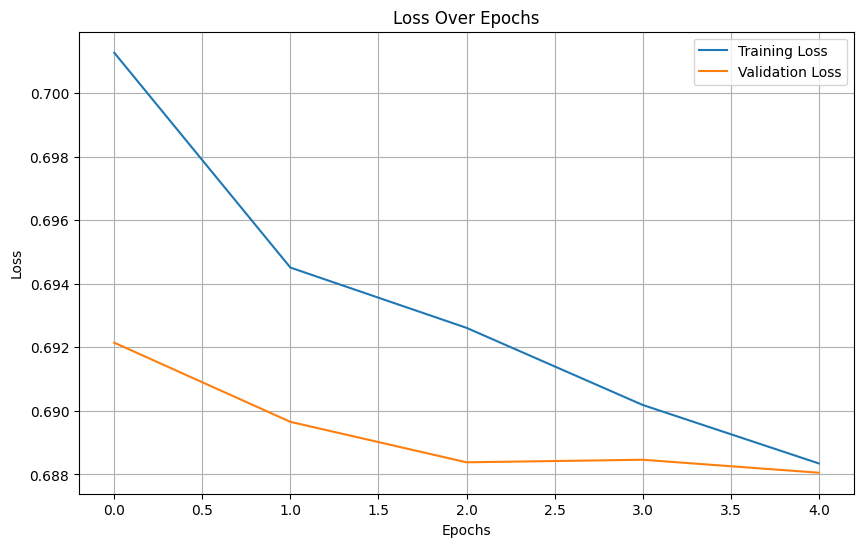

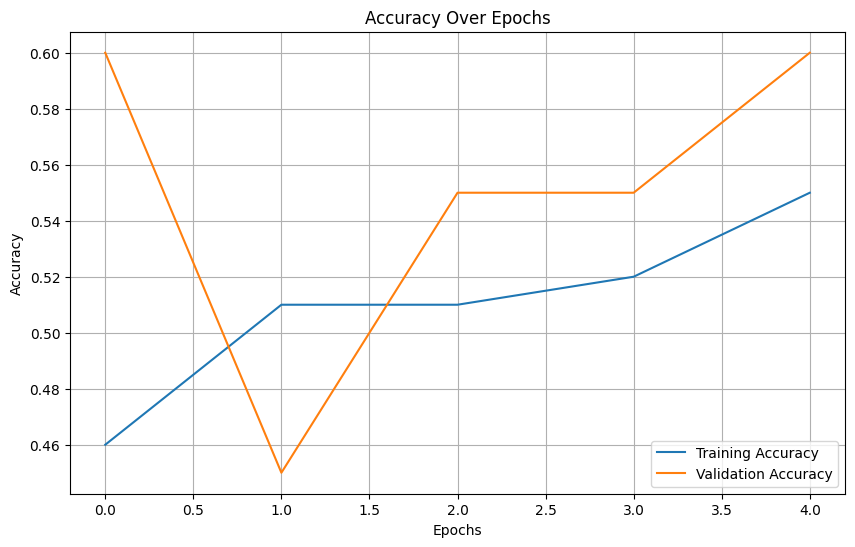

In [249]:
import matplotlib.pyplot as plt

# Extract the history data
history_data = history.history

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy (if available)
if 'accuracy' in history_data:
    plt.figure(figsize=(10, 6))
    plt.plot(history_data['accuracy'], label='Training Accuracy')
    plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    ''' If the training loss is decreasing with increasing epochs, it's a positive sign
    that you model is learning and improving its prediction on data'''
